# Chapter 3 - Making Decisions with Linear Equations
## Estimating the amount paid to the taxi driver



In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [2]:
data = {'Kilometres': '1 2 3 4 5'.split(), 'Meter': '7.5 10.0 12.5 15.0 17.5'.split(), 'Paid (incl. tips)': '8 10 14 15 20'.split()}

df_taxi = pd.DataFrame(data)
df_taxi

,Kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [3]:
# Initialize and train the model
reg = LinearRegression()
reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])

# Make predictions
df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['Kilometres']])

We only have one feature this time: Kilometres 

The fit() and predict() methods expect a two-dimensional ax , which is why we enclosed Kilometers in an extra set of square brackets— `df_taxi[['Kilometres']]` .

We put our predictions in the same DataFrame under Paid (Predicted). We can then plot the actual values versus the estimated ones using the following
code:

In [4]:
import matplotlib.pyplot as plt

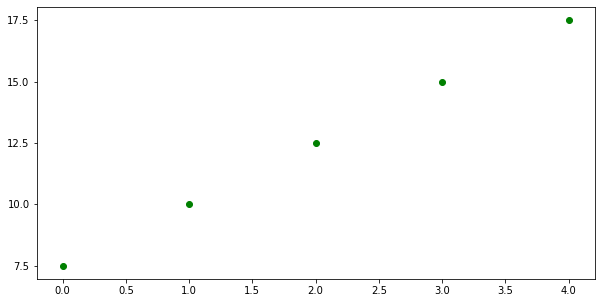

In [5]:
fig = plt.subplots(figsize=(10, 5))

X = df_taxi.index
y = df_taxi['Meter']
plt.scatter(x=X, y=y, color='g')
#plt.plot(X, reg.predict(X), color='k')


________________________________________________________________

# Predicting house prices in Boston


The Boston dataset is a small set representing the house prices in the city of Boston. It
contains:
- 506 samples
- 13 features

Let's load the data into a DataFrame, as follows:

In [6]:
from sklearn.datasets import load_boston

In [7]:
# initializing the dataset
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

df_boston['TARGET'] = boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Data exploration

It's important to make sure you do not have any null values in your data; 

otherwise, scikit-learn will complain about it. 

Here, I will count the sum of the null values in each column,
then take the sum of it. If I get 0, great:

In [9]:
df_boston.isnull().sum().sum()

0

For a regression problem, the most important thing to do is:
- to understand the distribution of your target!! 

If a target ranges between 1 and 10 , and after training our model we get amean absolute error of 5 , we can tell that the error is large in this context.

However, the same error for a target that ranges between 500,000 and 1,000,000 is negligible. 

Histograms are your friend when you want to visualize distributions. Inaddition to the target's distribution, let's also plot the mean values for each feature:

/home/anandaheino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


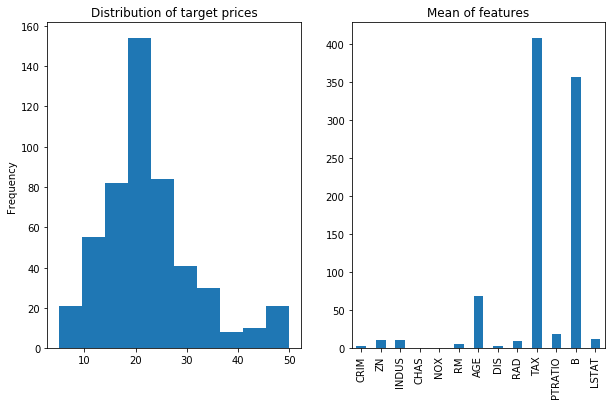

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

df_boston['TARGET'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])

df_boston[boston.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])

fig.show()

In the preceding graph, it is observed that:
- The prices range between 5 and 50
- Obviously, these are not real prices, probably normalized values
- We can tell from the histogram that most of the prices are below 35 

## We can use the following code snippet to see that 90% of the prices are below `34.8` :



In [11]:
df_boston['TARGET'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: TARGET, dtype: float64

## Splitting the data

When it comes to small datasets, it's advised that you allocate enough data for testing. 

So, we will split our data into 60% for training and 40% for testing using the train_test_split function:

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df_boston, test_size = 0.4, random_state = 14)

In [14]:
x_train = df_train[boston.feature_names]
x_test = df_test[boston.feature_names]
y_train = df_train['TARGET']
y_test = df_test['TARGET']

## Calculating a baseline

- The distribution of the target gave us an idea of what level of error we can tolerate.
- If we were in the real estate business and human agents were used to estimate house prices, then we would most likely be expected to build a model that can do better than the human agents.

#### Nevertheless, since we do not know any real estimations to compare our model to, we can come up with our own baseline instead.
- The mean house price is 22.5 . 
- If we build a dummy model that returns the mean price regardless of the data given to it, then it would make a reasonable baseline.
- Keep in mind that the value of 22.5 is calculated for the entire dataset, but since we are pretending to only have access to the training data, then it makes sense to calculate the mean price for the training set only. 
- To save us all this effort, scikit-learn has dummy regressors available that do all this work for us.

### Here, we will create a dummy regressor and use it to calculate baseline predictions for the test set:

In [15]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy='mean')
baseline.fit(x_train, y_train)

y_test_baseline = baseline.predict(x_test)

## OBS: 
- There are other strategies that we can use, such as finding the median (the 50 th quantile) or any other N th quantile. 
- Keep in mind that for the same data, using the mean as an estimation gives a lower MSE compared to when the median is used. 
- Conversely, the median gives a lower Mean Absolute Error (MAE).
- We want our model to beat the baseline for both the MAE and MSE.

# Training the Linear Regressor

In [16]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

# Evaluating our model's accuracy

There are three commonly used metrics for regression: R² , MAE, and MSE. Let's first write
the code that calculates the three metrics and prints the results:

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2   Regressor = {:.2f} vs Baseline = {:.2f}'.format(r2_score(y_test, y_test_pred), r2_score(y_test, y_test_baseline)))

print('MAE  Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_baseline)))

print('MSE  Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_baseline)))


R2   Regressor = 0.70 vs Baseline = -0.01
MAE  Regressor = 3.43 vs Baseline = 6.64
MSE  Regressor = 24.12 vs Baseline = 82.47


### MSE is more sensitive to outliers than MAE. 
- That's why the mean estimations for the baseline scored badly there.
- Obviously, in the baseline model, we already used the target's mean as the prediction. That's why its R² score is 0 .
- For MAE and MSE, the smaller their values, the better the model is.
- Conversely, for R 2 , the higher its values, the better the model is.

## Good thing: 
the model scored better than the dummy baseline in all the three scores!

# Showing feature coefficients

We know that a linear model multiplies each of the features by a certain coefficient, and then gets the sum of these products as its final prediction. We can use the regressor's `coef_`
method after the model is trained to print these coefficients:

In [18]:
df_feature_importance = pd.DataFrame({'Features': x_train.columns,
                                      'Coeff': reg.coef_,
                                      'ABS(Coeff)': abs(reg.coef_)}).set_index('Features').sort_values('Coeff', ascending=False)

In [19]:
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,3.861760,3.861760
CHAS,1.655302,1.655302
RAD,0.353022,0.353022
INDUS,0.053782,0.053782
ZN,0.052559,0.052559
AGE,0.016805,0.016805
B,0.006526,0.006526
TAX,-0.016255,0.016255
CRIM,-0.097264,0.097264


As we can see in these results, some coefficients are positive and others are negative. 
- A positive coefficient means that the feature correlates positively with the target and vice versa. 
- I also added another column for the absolute values of the coefficients { ABS ( coefff ) }

## BUT . . .
- Ideally, the value for each coefficient should tell us how important each feature is. 
- A higher absolute value, regardless of its sign, reflects high importance.
- However, checking the data, we notice that the maximum value for NOX is 0.87 , while TAX goes up to 711 . 
- This means that if NOX has just marginal importance, its coefficient will still be high to balance its small value, while for TAX , its coefficient will always be small compared to the high values of the feature itself.
- So, we need to SCALE the features to keep them all in the comparable ranges.

## Scaling for more meaningful coefficients

Using it with its default configuration will squeeze out all the values for all the features between 0 and 1 .

The scaler needs to be fitted first to learn the features' ranges. Fitting should be done on the training x set only. Then, we use the scaler's transform function to scale both the training and test x sets.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Instance of the scaling model and the linear regression model
scaler = MinMaxScaler()
reg = LinearRegression()

In [22]:
# Fitting the scaler with the training features, so they learn the range
scaler.fit(x_train)

# Now we use the tranform to scale both train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [23]:
reg.fit(x_train_scaled, y_train)
y_test_pred = reg.predict(x_test_scaler)

### There is a shorthand version of this code for fitting one dataset and then transforming it. In other words, the following uncommented line takes the place of the two commented ones:
- We will be using the `fit_transform()` function a lot from now on where needed.

 
```python
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
x_train_scaled = scaler.fit_transform(x_train)
 

- It's important to scale your features if you want meaningful coefficients.
- Furthermore, scaling helps gradient-based solvers converge quicker .
- In addition to scaling, you should also make sure you don't have highly correlated features for more meaningful coefficients and a stable linear regression model.

## Scaled features and retrained the model:

In [24]:
df_feature_importance = pd.DataFrame({'Features': x_train.columns,
                                      'Coeff': reg.coef_,
                                      'ABS(Coeff)': abs(reg.coef_)}).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,19.861033,19.861033
RAD,8.119513,8.119513
ZN,5.255855,5.255855
B,2.573527,2.573527
CHAS,1.655302,1.655302
AGE,1.631809,1.631809
INDUS,1.467174,1.467174
TAX,-8.517552,8.517552
CRIM,-8.653583,8.653583


### * Notice how NOX is less important now than before.
1) LSTAT: % lower status of the population

2) RM: average number of rooms per dwelling

3) DIS: weighted distances to five Boston employment centres

4) RAD: index of accessibility to radial highways

5) NOX: nitric oxides concentration (parts per 10 million)

## Adding polynomial features

Now that we know what the most important features are, we can plot the target against them to see how they correlate with them:

In [25]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

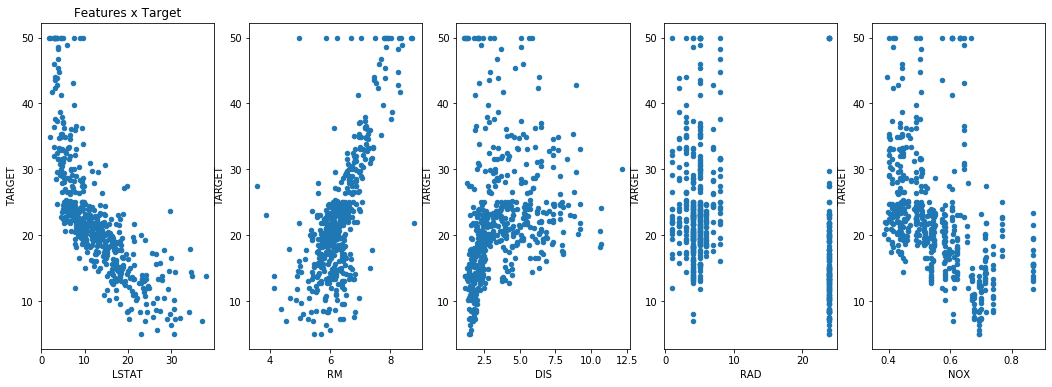

In [26]:
# defining the figure size and number of rows and columns 
fig, ax = plt.subplots(1, 5, figsize=(18, 6))

# Plotting the most important features x target to see their behaviour  
df_boston.plot(x='LSTAT', y='TARGET', title='Features x Target', kind='scatter', ax=ax[0])
df_boston.plot(x='RM', y='TARGET', kind='scatter', ax=ax[1])
df_boston.plot(x='DIS', y='TARGET', kind='scatter', ax=ax[2])
df_boston.plot(x='RAD', y='TARGET', kind='scatter', ax=ax[3])
df_boston.plot(x='NOX', y='TARGET', kind='scatter', ax=ax[4])

- These plots don't seem to be very linear, and a linear model will not be able to capture this non-linearity.
- Although we cannot turn a linear model into a non-linear one, we can still transform the data instead.
- Think of it this way: if `y` is a function of `x²` , we can either use a non-linear model—one that is capable of capturing the quadratic relation between x and y . . . 
- OR we can just calculate x² and give it to a linear model instead of x.
- Furthermore, linear regression algorithms do not capture feature interactions.
- The current model cannot capture interactions between multiple features.

### A polynomial transformation can solve both the non-linearity and feature interaction issues 

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# To get both the quadratic and cubic feature transformation, we set the degree parameter to 3
poly = PolynomialFeatures(degree=3)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### One annoying thing about PolynomialFeatures is...
- that it doesn't keep track of the DataFrame's column names. 
- It replaces the feature names with x0 , x1 , x2 , and so on.
- So, let's replace it back:

In [28]:
print('TAKING A LOOK AT THE FEATURE NAMES THAT THE POLYNOMIAL TRANSOFORMATION MADE:\n')
print(poly.get_feature_names()[:10], ' . . .')

TAKING A LOOK AT THE FEATURE NAMES THAT THE POLYNOMIAL TRANSOFORMATION MADE:

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']  . . .


In [29]:
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)]

def translate_feature_names(s):
    """This function replaces all the new made up names from the polynomial 
    transformation (e.g. x1, x2^2, x3) to the original feature names."""
    
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s

In [30]:
poly_features = [translate_feature_names(f) for f in poly.get_feature_names()]
x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [31]:
x_train_poly.head()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,ZN0^3,ZN0^2 ZN1,ZN0^2 ZN2,ZN0 ZN1^2,ZN0 ZN1 ZN2,ZN0 ZN2^2,ZN1^3,ZN1^2 ZN2,ZN1 ZN2^2,ZN2^3
0,1.0,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,...,8242.408,159727.2580,9021.7644,3.095309e+06,174830.1819,9874.81242,5.998310e+07,3.387984e+06,191361.154545,10808.519931
1,1.0,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,...,7645.373,153520.6422,3686.8550,3.082726e+06,74032.7970,1777.92500,6.190176e+07,1.486594e+06,35701.095000,857.375000
2,1.0,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,...,5177.717,118788.2010,1726.9033,2.725262e+06,39618.9549,575.96717,6.252350e+07,9.089458e+05,13213.952010,192.100033
3,1.0,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,...,6751.269,141776.6490,4675.8789,2.977310e+06,98193.4569,3238.47909,6.252350e+07,2.062063e+06,68008.060890,2242.946629
4,1.0,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,...,2197.000,64776.0100,1316.5100,1.909846e+06,38815.7783,788.89330,5.630960e+07,1.144438e+06,23259.608689,472.729139


## Fitting the linear regressor with the derived features

- Now, we are ready to use our linear regressor with the newly transformed features. 
- One thing to keep in mind is that the `PolynomialFeatures` transformer adds one additional column where all the values are 1 . - The coefficient this column gets after training is equivalent to the intercept. 
- So, we will not fit an intercept by setting `fit_intercept=False` when training our regressor this time:

In [32]:
reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)
y_test_pred_poly = reg.predict(x_test_poly)

In [33]:
print('R2   Regressor = {:.2f} vs Baseline = {:.2f}'.format(r2_score(y_test, y_test_pred_poly), r2_score(y_test, y_test_baseline)))

print('MAE  Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_absolute_error(y_test, y_test_pred_poly), mean_absolute_error(y_test, y_test_baseline)))

print('MSE  Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_squared_error(y_test, y_test_pred_poly), mean_squared_error(y_test, y_test_baseline)))

R2   Regressor = -90.28 vs Baseline = -0.01
MAE  Regressor = 34.34 vs Baseline = 6.64
MSE  Regressor = 7438.41 vs Baseline = 82.47


## 😞 The regressor is way worse than before and even worse than the baseline. 
- What did the polynomial features do to our model?
- One major problem with the ordinary least squares regression algorithm is that:
### it doesn't work well with highly correlated features (multicollinearity).
- The polynomial feature transformation's kitchen-sink approach — where we add features, their squared and cubic values, and the product of the features' pairs and triples—will very likely give us multiple correlated features. 
- This multi-collinearity harms the model's performance. 
- Shape of `x_train_poly`:

In [34]:
x_train_poly.shape

(303, 560)

( samples , features )
- This is another problem, where we have too many features compared to our samples...
- this is known as: 
### The curse of dimensionality
- the number of possibilities increases exponentially with the number of features. 
- For a supervised learning algorithm to work well, it needs enough samples to cover a reasonable number of all these possibilities. 
- This problem is even more drastic when we have non-binary features, as is our case here.

# Regularization is the solution
- Originally, our objective was to minimize the MSE value of the regressor. 
- Now, we see that too many features are an issue. 
- So, we need to improve our objective. 
   - Now, the model need to IGNORE the useless features! This second part of our objective is what regularization does (in a nutshell).
Two algorithms are commonly used for regularized linear regression: LASSO and RIDGE

### 1) Lasso pushes the model to have fewer coefficients.

- regularization : L1, which penalizes the absolute values of the coefficients

### 2) ridge pushes the model to have as small values as possible for its coefficients. 

- regularization : L2, which penalizes the squared values of the coefficients. 

### Hyperparameter (alpha): Controls how strongly the coefficients will be regularized. 
- Setting alpha to 0 means no regularization at all, which brings us back to an ordinary least squares regressor. 
- Larger values for alpha specify stronger regularization.

In [40]:
from sklearn.linear_model import Lasso, Ridge

reg_lasso = Lasso(fit_intercept=False)
reg_lasso.fit(x_train_poly, y_train)

y_test_pred_lasso = reg_lasso.predict(x_test_poly)

/home/anandaheino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 713.4960223887849, tolerance: 18.537676
  positive)


In [41]:
print('R2   Regressor = {:.2f} vs Baseline = {:.2f}'.format(r2_score(y_test, y_test_pred_lasso), r2_score(y_test, y_test_baseline)))

print('MAE  Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_absolute_error(y_test, y_test_pred_lasso), mean_absolute_error(y_test, y_test_baseline)))

print('MSE  Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_squared_error(y_test, y_test_pred_lasso), mean_squared_error(y_test, y_test_baseline)))

R2   Regressor = 0.76 vs Baseline = -0.01
MAE  Regressor = 2.64 vs Baseline = 6.64
MSE  Regressor = 19.42 vs Baseline = 82.47


- Fix: problems introduced by the polynomial features
- Better performance than the original linear regressor:
    - MAE is 2.4 here, compared to 3.6 before
    - MSE is 16.2 , compared to 25.8 before
    - R² is 0.79 , compared to 0.73 before.
    
### - Now that we have seen promising results after applying regularization, it's time to see how to set an optimum value for the regularization parameter.

## Finding the optimum regularization parameter
- After splitting the data into training and test sets, we would further split the training set into N folds. 
- Then, we would make a list of all the values of alpha that we would like to test and loop over them one after the other. 
- With each iteration, we would apply N-fold cross-validation to find the value for alpha that gives the minimal error.
### Scikit-learn has a module called LassoCV ( CV = cross-validation ). 
- Finding the best value for alpha:

In [42]:
from sklearn.linear_model import LassoCV

In [43]:
# Make a list of 50 values between 0.000001 and 1,000,000
alphas = np.logspace(-6, 6, 50)

# We will do 5-fold cross validation
reg_lasso_CV = LassoCV(alphas=alphas, fit_intercept=False, cv=5)

reg_lasso_CV.fit(x_train_poly, y_train)
y_train_pred_lasso_CV = reg_lasso_CV.predict(x_train_poly)
y_test_pred_lasso_CV = reg_lasso_CV.predict(x_test_poly)

/home/anandaheino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.28686132631447, tolerance: 13.953584000000001
  positive)
/home/anandaheino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2202.9572100684604, tolerance: 13.953584000000001
  positive)
/home/anandaheino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2202.5612043877454, tolerance: 13.953584000000001
  positive)
/home/anandaheino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You m

## Chosen Alpha:

In [44]:
reg_lasso_CV.alpha_

68.66488450042998